In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
np.random.seed(2343243)

In [3]:
mean_vec1 = np.array([0,0,0])
cov_matl = np.array([[1,0,0] ,[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1 , cov_matl , 100)


In [4]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0] ,[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2 , cov_mat2 , 100)


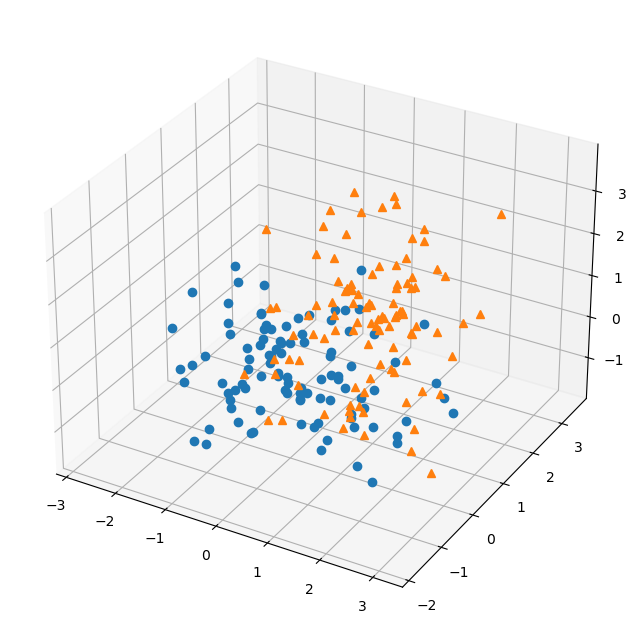

In [5]:
from matplotlib import pyplot as plt
#to change the data into 3-d
from mpl_toolkits.mplot3d import Axes3D, proj3d
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111 ,projection = '3d')
ax.plot(class1[:,0] ,class1[:,1],class1[:,2] ,'o')
ax.plot(class2[:,0] ,class2[:,1],class2[:,2] ,'^')
plt.show()

In [6]:
all_data = np.concatenate((class1,class2))


In [7]:
pca = PCA()
transformed_data = pca.fit_transform(all_data)
transformed_data

array([[-0.52351425, -0.63301617,  0.2614942 ],
       [-0.78786184,  0.94206431,  1.58775251],
       [-1.28725924,  0.54439067, -0.91753666],
       [ 0.66747707,  1.69846274, -0.5106706 ],
       [-1.74150174, -0.755306  , -0.20173787],
       [-1.03559449, -1.53950125,  0.07304315],
       [-0.21765053, -0.85555712,  1.35739161],
       [-0.7648506 , -0.46590375,  0.50754955],
       [-0.64255217,  1.16920769, -0.07626341],
       [-0.5783154 , -0.30888845,  0.67354078],
       [ 0.25251683, -0.38101091, -0.98630538],
       [-0.26298255, -0.44282938,  1.5237559 ],
       [-0.86147962,  0.21339394,  0.7283895 ],
       [-0.9917517 , -0.32293363, -0.38016892],
       [-1.3133147 ,  0.01268907,  1.42878555],
       [-1.09145198, -0.50248537, -0.49384452],
       [-2.05840949, -1.13678107,  0.8152972 ],
       [-0.62975084, -1.78591257,  2.05065126],
       [-1.75005325, -1.27909834,  0.83462504],
       [-0.66142546,  1.66188479,  0.65692743],
       [-0.34624366,  0.47524286,  0.198

In [8]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202],
       [ 0.0402454 , -0.71540934,  0.69754554]])

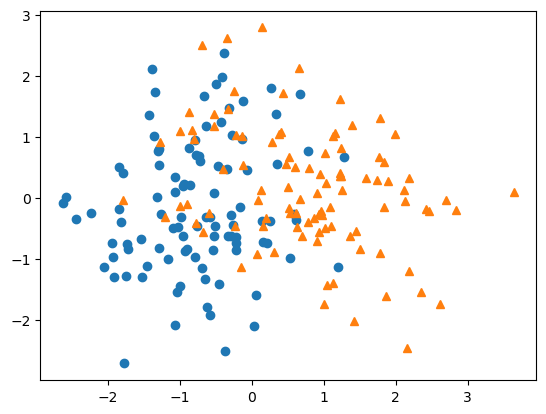

In [9]:
plt.plot(transformed_data[0:100,0],transformed_data[0:100,1],"o")
plt.plot(transformed_data[100:200,0],transformed_data[100:200,1],"^")
plt.show() 

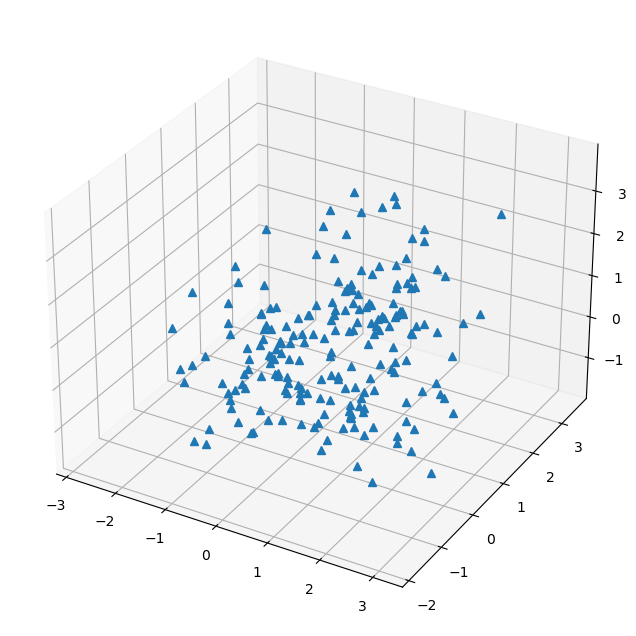

In [10]:
X_approx = pca.inverse_transform(transformed_data) #converting the 2D data back into 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(X_approx[:, 0], X_approx[:, 1], X_approx[:, 2], '^')
plt.show()


In [14]:
all_data_t = all_data.T
cov = np.cov(all_data_t)
cov

array([[1.14139998, 0.1061989 , 0.0918139 ],
       [0.1061989 , 1.11579657, 0.27166986],
       [0.0918139 , 0.27166986, 1.11826602]])

In [17]:
eig_val , eig_vector = np.linalg.eig(cov)
eig_val , eig_vector

(array([1.45186534, 1.07866114, 0.8449361 ]),
 array([[ 0.41124564,  0.91063567,  0.0402454 ],
        [ 0.64810013, -0.26106644, -0.71540934],
        [ 0.64097055, -0.32029202,  0.69754554]]))

In [19]:
eig_val_vector_pair =[]
for i in range(len(eig_val)):
    eig_vec = eig_vector[:,i]
    eig_val_vector_pair.append((eig_val[i],eig_vec))
eig_val_vector_pair.sort(reverse = True)
eig_val_vector_pair

[(1.4518653417359295, array([0.41124564, 0.64810013, 0.64097055])),
 (1.0786611401978585, array([ 0.91063567, -0.26106644, -0.32029202])),
 (0.844936095532705, array([ 0.0402454 , -0.71540934,  0.69754554]))]

In [20]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202],
       [ 0.0402454 , -0.71540934,  0.69754554]])

In [21]:
pca.explained_variance_

array([1.45186534, 1.07866114, 0.8449361 ])